# Use hcluster_single.py for this exercise

In [42]:
from PIL import Image
from numpy import *
from pylab import *
import scipy.misc

In [43]:
from scipy.cluster.vq import *

In [44]:
from scipy.misc import imresize

In [57]:
import os
import hcluster_single
hcluster = reload(hcluster_single)

In [58]:
path = 'alamo/'
imlist = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]

In [59]:
features = zeros([len(imlist), 512])
for i, f in enumerate(imlist):
    im = array(Image.open(f))

    h, edges = histogramdd(im.reshape(-1, 3), 8, normed=True, range=[(0,255), (0, 255), (0, 255)])

    features[i] = h.flatten()

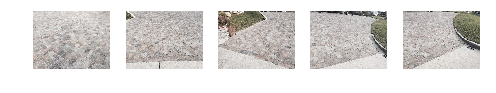

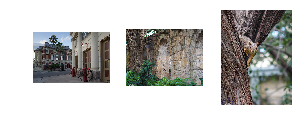

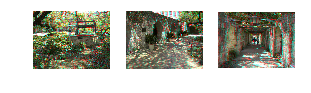

In [78]:
tree = hcluster.hcluster(features, hcluster_single.L2dist)
clusters = tree.extract_clusters(0.24*tree.distance)

for c in clusters:
    elements = c.get_cluster_elements()
    nbr_elements = len(elements)
    if nbr_elements>2:
        figure(figsize=(8, 8))
        for p in range(minimum(nbr_elements, 20)):
            subplot(4, 5, p+1)
            im = array(Image.open(imlist[elements[p]]))
            imshow(im)
            axis('off')
show()
hcluster.draw_dendrogram(tree, imlist, filename='alamo_average.pdf')

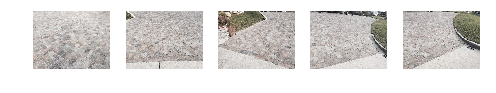

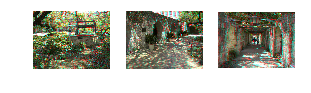

In [79]:
tree = hcluster.hcluster(features, hcluster_single.L2dist_single)
clusters = tree.extract_clusters(0.24*tree.distance)

for c in clusters:
    elements = c.get_cluster_elements()
    nbr_elements = len(elements)
    if nbr_elements>2:
        figure(figsize=(8, 8))
        for p in range(minimum(nbr_elements, 20)):
            subplot(4, 5, p+1)
            im = array(Image.open(imlist[elements[p]]))
            imshow(im)
            axis('off')
show()
hcluster.draw_dendrogram(tree, imlist, filename='alamo_single.pdf')

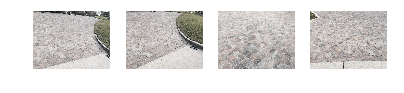

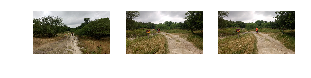

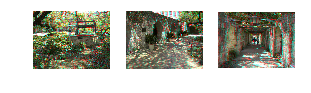

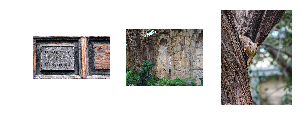

In [83]:
tree = hcluster.hcluster(features, hcluster_single.L2dist_complete)
clusters = tree.extract_clusters(0.18*tree.distance)

for c in clusters:
    elements = c.get_cluster_elements()
    nbr_elements = len(elements)
    if nbr_elements>2:
        figure(figsize=(8, 8))
        for p in range(minimum(nbr_elements, 20)):
            subplot(4, 5, p+1)
            im = array(Image.open(imlist[elements[p]]))
            imshow(im)
            axis('off')
show()
hcluster.draw_dendrogram(tree, imlist, filename='alamo_complete.pdf')

In [37]:
tree = hcluster.hcluster(features, hcluster_single.L2dist_single)

In [40]:
clusters = tree.extract_clusters(tree.distance)

for c in clusters:
    elements = c.get_cluster_elements()
    nbr_elements = len(elements)
    if nbr_elements>2:
        figure(figsize=(8, 8))
        for p in range(minimum(nbr_elements, 20)):
            subplot(4, 5, p+1)
            im = array(Image.open(imlist[elements[p]]))
            imshow(im)
            axis('off')
show()

In [41]:
hcluster.draw_dendrogram(tree, imlist, filename='alamo_average.pdf')

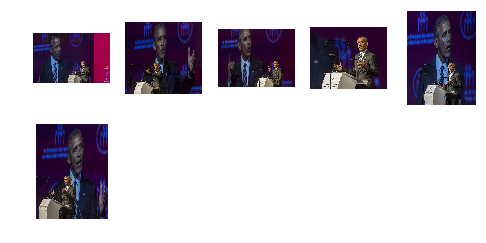

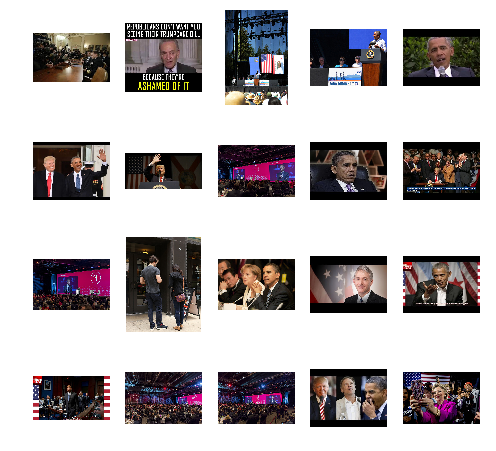

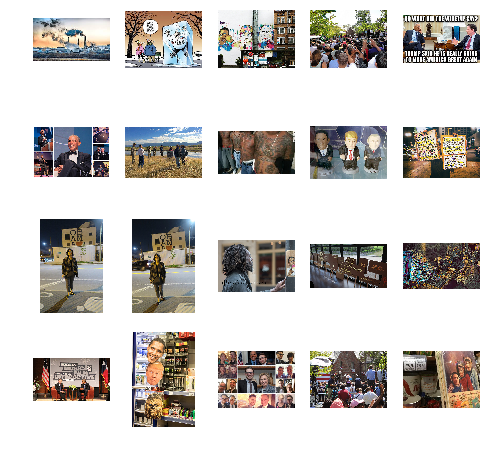

In [14]:
path = 'Obama/'
imlist = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]
features = zeros([len(imlist), 512])
for i, f in enumerate(imlist):
    im = array(Image.open(f))

    h, edges = histogramdd(im.reshape(-1, 3), 8, normed=True, range=[(0,255), (0, 255), (0, 255)])

    features[i] = h.flatten()
tree = hcluster.hcluster(features, hcluster_single.L2dist)
clusters = tree.extract_clusters(0.24*tree.distance)

for c in clusters:
    elements = c.get_cluster_elements()
    nbr_elements = len(elements)
    if nbr_elements>2:
        figure(figsize=(8, 8))
        for p in range(minimum(nbr_elements, 20)):
            subplot(4, 5, p+1)
            im = array(Image.open(imlist[elements[p]]))
            imshow(im)
            axis('off')
show()
hcluster.draw_dendrogram(tree, imlist, filename='Obama_average.pdf')